In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from keras import regularizers

print('modules loaded')


modules loaded


In [ ]:
img_dir = r'C:\Users\Abhay Thakur\Downloads\Mango leafs dataset'
data = tf.keras.preprocessing.image_dataset_from_directory(img_dir)

Data preprocessing,agumentation for genralization,tain&test data  

In [3]:

num_images = data.cardinality().numpy() * 32
img_size = (224, 224)
batch_size = 64
n_classes = 8


datagen = ImageDataGenerator(
        rescale = 1./255,
        width_shift_range = 0.2,
        height_shift_range = 0.2,
        shear_range = 0.3,
        zoom_range = 0.2,
        horizontal_flip = True,
        fill_mode = 'nearest',
        validation_split = 0.20)


train_data = datagen.flow_from_directory(
    img_dir,
    target_size = img_size,
    batch_size = batch_size,
    class_mode = 'categorical',
    subset = 'training')

val_data = datagen.flow_from_directory(
    img_dir,
    target_size = img_size,
    batch_size = batch_size,
    class_mode = 'categorical',
    subset = 'validation')

Found 3200 images belonging to 8 classes.
Found 800 images belonging to 8 classes.


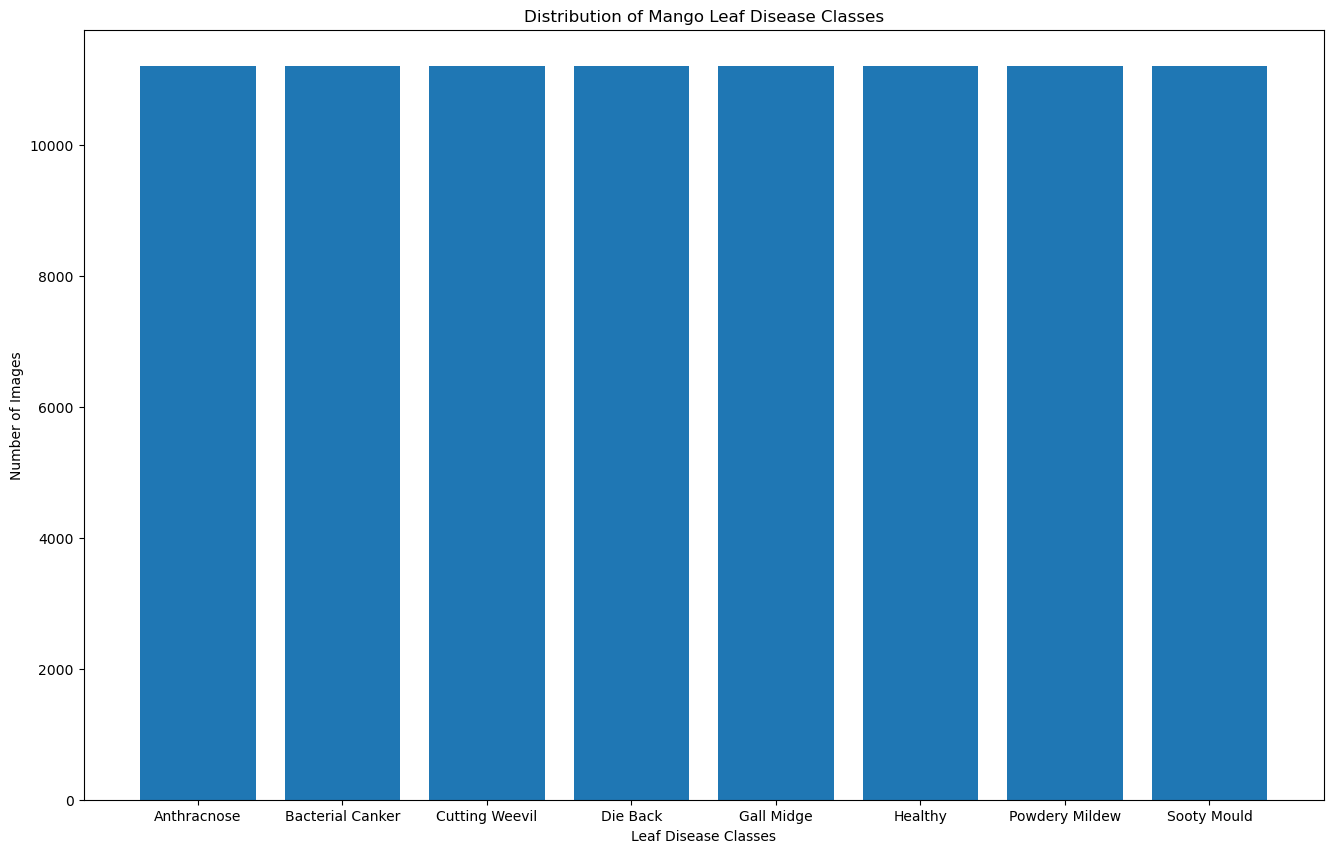

In [51]:

class_names = ['Anthracnose', 'Bacterial Canker', 'Cutting Weevil', 'Die Back',
               'Gall Midge', 'Healthy', 'Powdery Mildew', 'Sooty Mould']


class_counts = train_data.labels.sum(axis=0)


plt.figure(figsize=(16, 10))
plt.bar(class_names, class_counts)
plt.xlabel('Leaf Disease Classes')
plt.ylabel('Number of Images')
plt.title('Distribution of Mango Leaf Disease Classes')
plt.show()


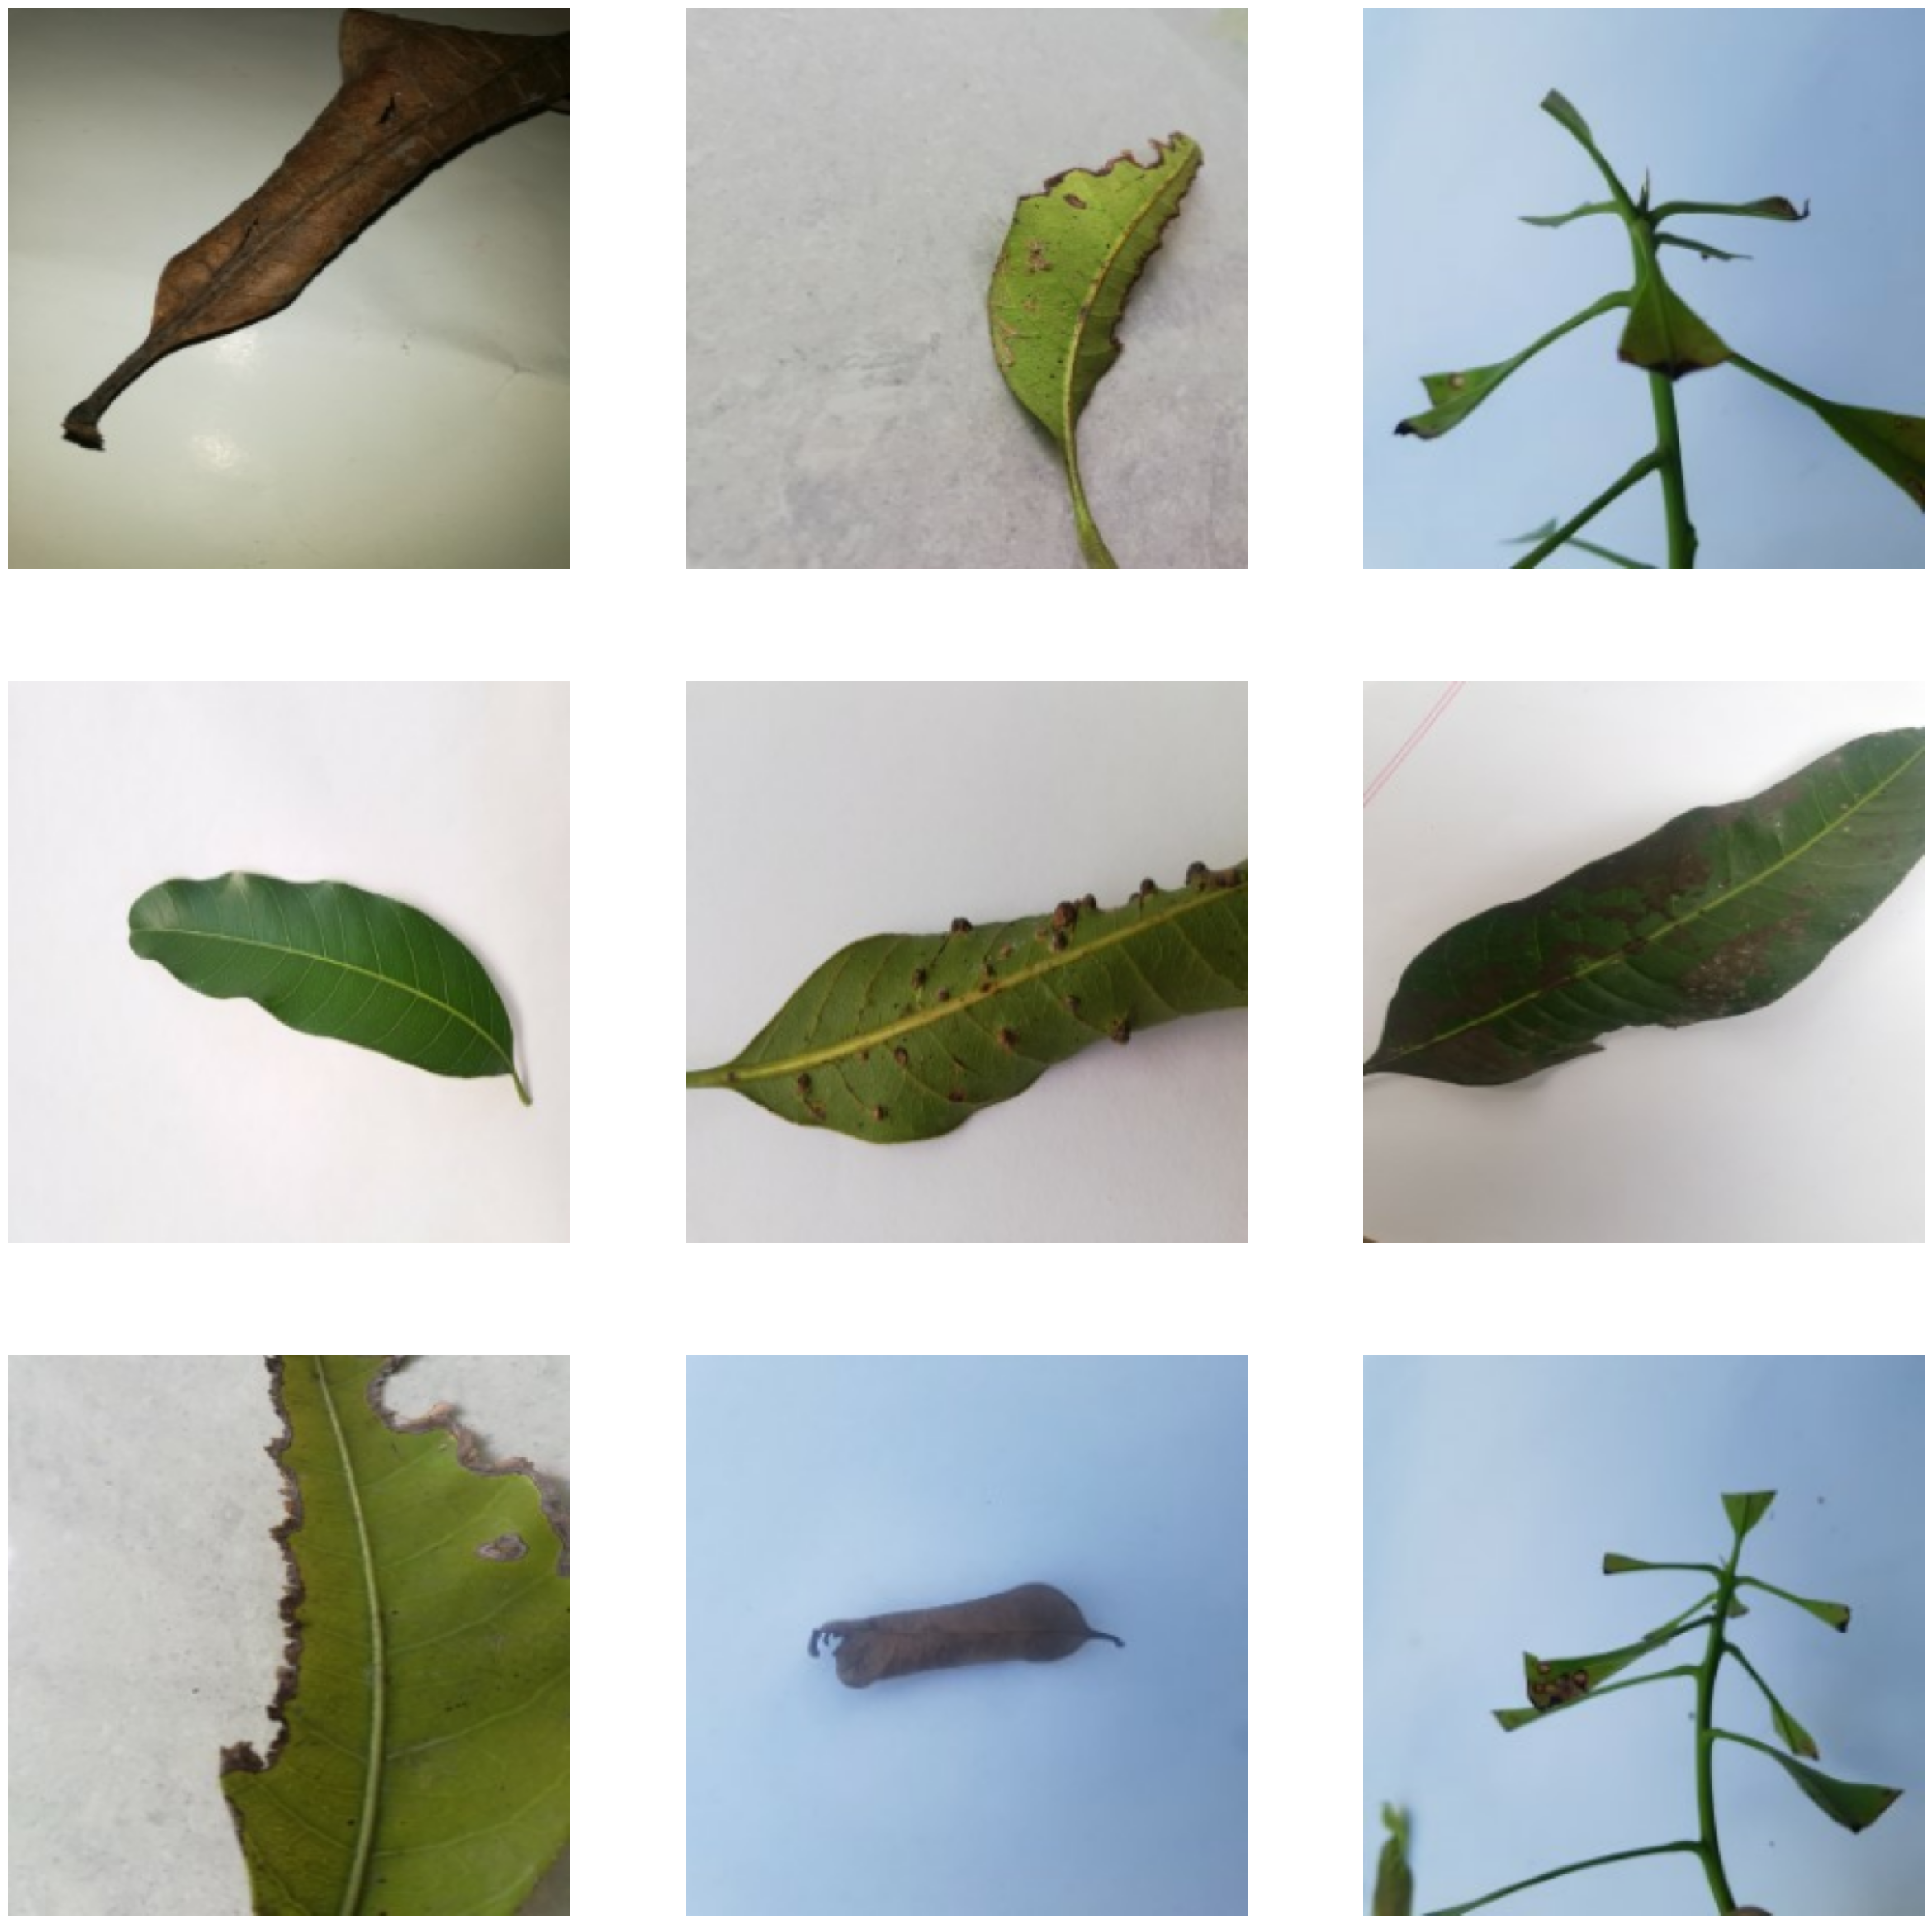

In [4]:
plt.figure(figsize = (30,30))
for images, labels in data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        ax.imshow(images[i].numpy().astype('uint8'))
        ax.axis('off')

In [6]:
pre_trained = InceptionV3(weights = 'imagenet', include_top = False, input_shape = (224, 224, 3))

for layer in pre_trained.layers:
    layer.trainable = False

In [7]:
model = Sequential([
    pre_trained,
    Flatten(),
    BatchNormalization(axis =- 1, momentum = 0.50, epsilon = 0.001),
    Dropout(0.2),
    Dense(64, activation = 'relu'),
    Dropout(0.3),
    Dense(n_classes, activation = 'softmax', kernel_regularizer = regularizers.l1(0.001))
])


model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten (Flatten)           (None, 51200)             0         
                                                                 
 batch_normalization_94 (Ba  (None, 51200)             204800    
 tchNormalization)                                               
                                                                 
 dropout (Dropout)           (None, 51200)             0         
                                                                 
 dense (Dense)               (None, 64)                3276864   
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                       

In [8]:
history = model.fit(train_data, epochs =30, validation_data = val_data)

Epoch 1/30


50/50 [==============================] - 410s 8s/step - loss: 2.0243 - accuracy: 0.7997 - val_loss: 2.5597 - val_accuracy: 0.8225
Epoch 2/30
50/50 [==============================] - 389s 8s/step - loss: 1.1487 - accuracy: 0.8978 - val_loss: 1.2447 - val_accuracy: 0.8950
Epoch 3/30
50/50 [==============================] - 397s 8s/step - loss: 0.8768 - accuracy: 0.9162 - val_loss: 2.2333 - val_accuracy: 0.8725
Epoch 4/30
50/50 [==============================] - 386s 8s/step - loss: 0.8651 - accuracy: 0.9309 - val_loss: 1.3738 - val_accuracy: 0.8838
Epoch 5/30
50/50 [==============================] - 409s 8s/step - loss: 0.6336 - accuracy: 0.9406 - val_loss: 1.7512 - val_accuracy: 0.8788
Epoch 6/30
50/50 [==============================] - 413s 8s/step - loss: 0.6258 - accuracy: 0.9344 - val_loss: 1.2640 - val_accuracy: 0.9100
Epoch 7/30
50/50 [==============================] - 414s 8s/step - loss: 0.6192 - accuracy: 0.9391 - val_loss: 1.1722 - val_accuracy: 0.9212
Epoch 8/30


In [10]:
model.save("ATCNN_model.h5")

In [11]:
model.save(r"C:\Users\Abhay Thakur\courcera data analytics tik tok project\COURCERA ADVANCE DATA ANALYTICS CAPSTONE PROJECT ON PREDICTING EMPLOYEE RETENTION FOR HR DEPARTMENT\Mango leafs disease classification CNN model\AT_model.keras")

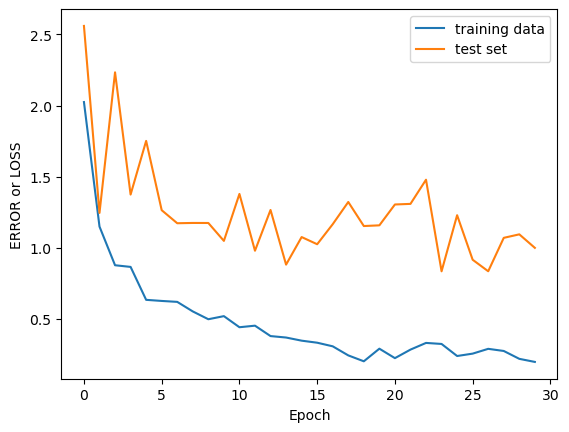

In [14]:
plt.xlabel('Epoch')
plt.ylabel('ERROR or LOSS')
plt.plot(history.history['loss'], label = 'training data')
plt.plot(history.history['val_loss'], label = 'test set')
plt.legend()


# Accuracy Curve

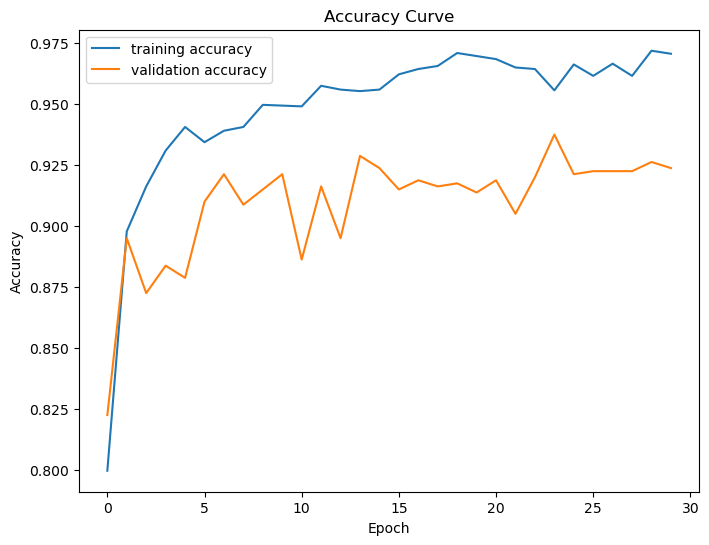

In [17]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curve')
plt.show()


# Loss curve

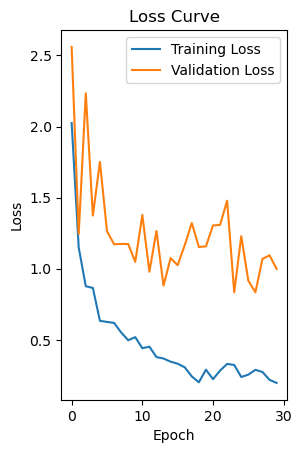

In [38]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()

In [22]:
plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten (Flatten)           (None, 51200)             0         
                                                                 
 batch_normalization_94 (Ba  (None, 51200)             204800    
 tchNormalization)                                               
                                                                 
 dropout (Dropout)           (None, 51200)             0         
                                                                 
 dense (Dense)               (None, 64)                3276864   
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                        

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

model = tf.keras.models.load_model("ATCNN_model.h5")

def predict_disease_from_user_input():
    image_path = input("Enter the path to the image: ").strip('"')  
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0 

    predictions = model.predict(img_array)
    class_names = ['Anthracnose', 'Bacterial Canker', 'Cutting Weevil', 'Die Back',
                   'Gall Midge', 'Healthy', 'Powdery Mildew', 'Sooty Mould']

    predicted_class = class_names[np.argmax(predictions)]
    confidence = np.max(predictions)

    return predicted_class, confidence


predicted_class, confidence = predict_disease_from_user_input()
print(f"The image is predicted to be: {predicted_class} with confidence: {confidence}")

Enter the path to the image: "C:\Users\Abhay Thakur\Downloads\anthracnose-0028.jpg"
1/1 [==============================] - 2s 2s/step
The image is predicted to be: Anthracnose with confidence: 1.0


# User Interface  

In [ ]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the trained model
model = tf.keras.models.load_model("ATCNN_model.h5")

def predict_disease(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Normalize pixel values

    predictions = model.predict(img_array)
    class_names = ['Anthracnose', 'Bacterial Canker', 'Cutting Weevil', 'Die Back',
                   'Gall Midge', 'Healthy', 'Powdery Mildew', 'Sooty Mould']

    predicted_class = class_names[np.argmax(predictions)]
    confidence = np.max(predictions)

    return predicted_class, confidence

def select_image():
    file_path = filedialog.askopenfilename()
    if file_path:
        predicted_class, confidence = predict_disease(file_path)
        result_label.config(text=f"Predicted Disease: {predicted_class}\nConfidence: {confidence:.2f}")

# Create GUI
root = tk.Tk()
root.title("Mango Disease Prediction")
root.geometry('800x600')

# Styling
root.configure(bg='#FFEB3B')  # Light yellow background color resembling a mango leaf

# Load and display a background image
bg_image = Image.open(r"C:\Users\Abhay Thakur\Downloads\pexels-photo-1939485.jpeg")
bg_photo = ImageTk.PhotoImage(bg_image)

def resize_bg(event):
    new_width = event.width
    new_height = event.height
    bg_image_resized = bg_image.resize((new_width, new_height))
    bg_photo_resized = ImageTk.PhotoImage(bg_image_resized)
    bg_label.config(image=bg_photo_resized)
    bg_label.image = bg_photo_resized

root.bind("<Configure>", resize_bg)

bg_label = tk.Label(root, image=bg_photo)
bg_label.place(x=0, y=0, relwidth=1, relheight=1)

# Label with informative text
info_label = tk.Label(root, text="Mango Disease Prediction System", bg='#FFEB3B', fg='#1E8449', font=('Arial', 28, 'bold'))
info_label.place(relx=0.5, rely=0.05, anchor='center')

instructions_label = tk.Label(root, text="Please select an image of a mango leaf for disease prediction.", bg='#FFEB3B', fg='#1E8449', font=('Arial', 16))
instructions_label.place(relx=0.5, rely=0.15, anchor='center')

# Button to select an image
select_button = tk.Button(root, text="Select Image", command=select_image, bg='#4CAF50', fg='white', font=('Arial', 16, 'bold'), relief='raised', borderwidth=3)
select_button.place(relx=0.5, rely=0.9, anchor='center')

# Label to display prediction result
result_label = tk.Label(root, text="", bg='#FFEB3B', fg='#1E8449', font=('Arial', 18))
result_label.place(relx=0.5, rely=0.8, anchor='center')

root.mainloop()
